In [1]:
import pandas as pd

In [2]:
mozilla_files_df = pd.read_csv("mozilla_data_files_summary.csv")

In [34]:
# List of audio files to process
tinit_files_df = pd.read_csv("tinit_data_files_summary.csv")
audio_files = tinit_files_df['full_path'].to_list()#.sample(n=100).values

In [ ]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# Function to calculate metrics for a single audio file
def calculate_metrics(audio_file):
    y, sr = librosa.load(audio_file)  # Load audio file
    duration = librosa.get_duration(y=y, sr=sr)
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    energy_distribution = librosa.feature.chroma_stft(S=np.abs(librosa.stft(y)), sr=sr)
    zero_crossings_rate = librosa.feature.zero_crossing_rate(y)
    # Add more metrics here

    return {
        "Audio File": audio_file,
        "Duration": duration,
        "Centroid": np.mean(centroid),
        "Rolloff": np.mean(rolloff),
        "Bandwidth": np.mean(bandwidth),
        "Energy Distribution": np.mean(energy_distribution),
        "Zero Crossings Rate": np.mean(zero_crossings_rate),
        # Add more metrics here
    }

# List of audio files to process

# Initialize an empty list to store dictionaries of metrics
results_list = []

# Calculate metrics for each audio file in parallel and add them to the list
results_list = Parallel(n_jobs=-1)(delayed(calculate_metrics)(audio_file) for audio_file in audio_files)

# Create a Pandas DataFrame from the list
results_df = pd.DataFrame(results_list)

Duration:
  Mean: 3.0761694417449523
  Median: 2.9504761904761905
  Standard Deviation: 0.8631597885414946
  Min: 0.9152834467120181
  Max: 7.788843537414966


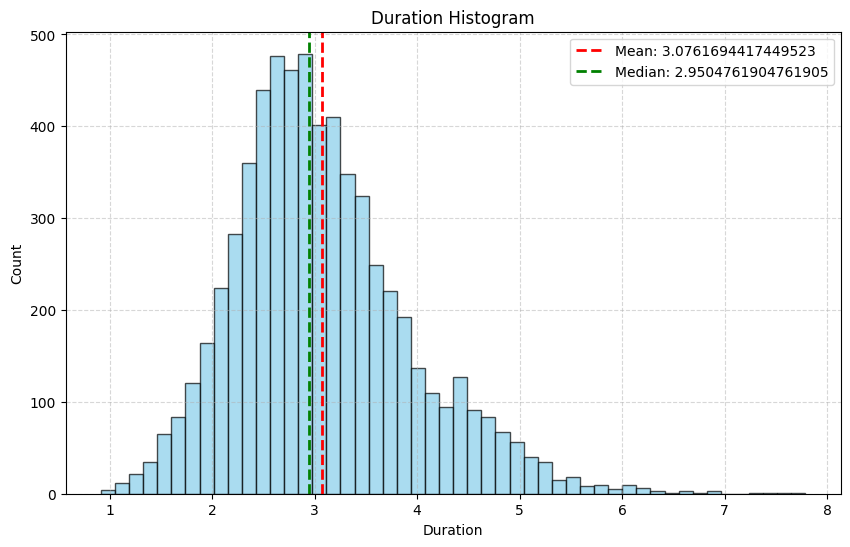

Centroid:
  Mean: 2127.7593448464395
  Median: 2104.6649238640384
  Standard Deviation: 270.2122124367298
  Min: 1327.1926044488248
  Max: 3144.5967103700577


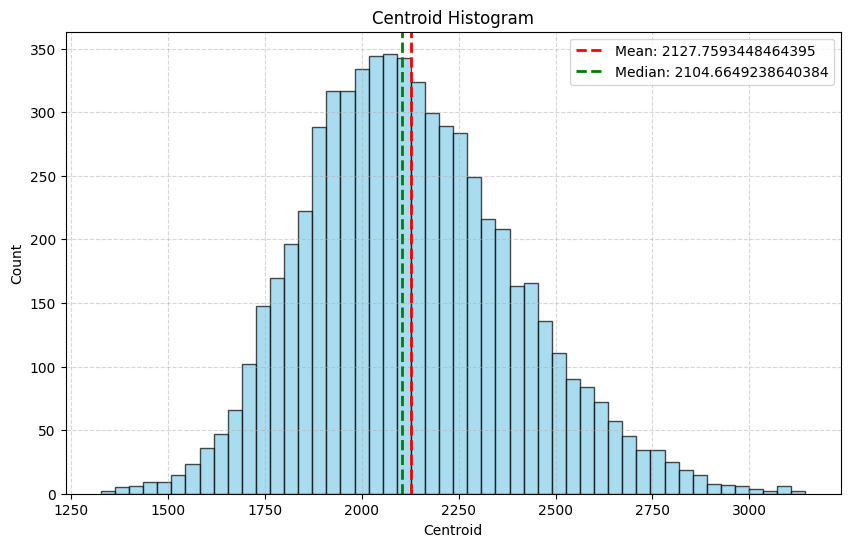

Rolloff:
  Mean: 3717.8634314067936
  Median: 3698.69130859375
  Standard Deviation: 449.8143325490347
  Min: 2185.143718888274
  Max: 5307.151544744318


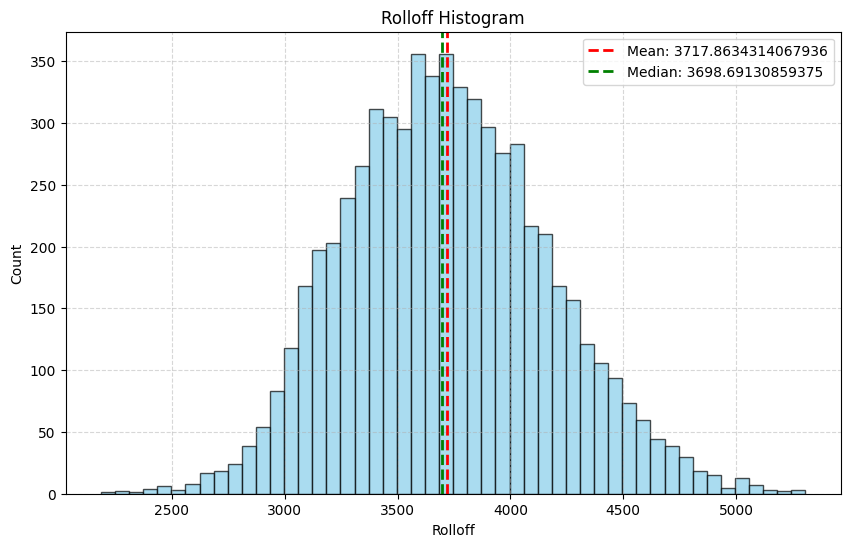

Bandwidth:
  Mean: 1588.4713345961734
  Median: 1586.766897600153
  Standard Deviation: 126.23955539408584
  Min: 1143.2919557255418
  Max: 2065.4242886102984


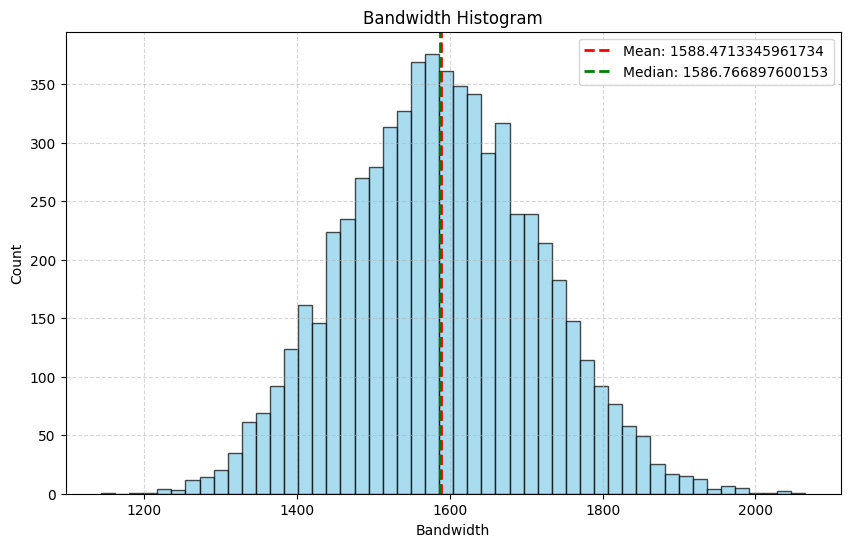

Energy Distribution:
  Mean: 0.6125994324684143
  Median: 0.6218880414962769
  Standard Deviation: 0.051081445068120956
  Min: 0.45013269782066345
  Max: 0.7458321452140808


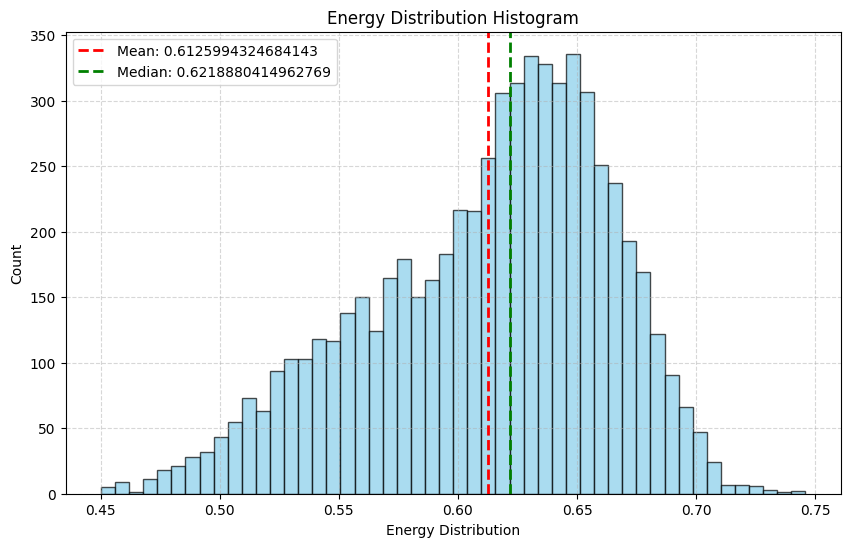

Zero Crossings Rate:
  Mean: 0.1413848733287115
  Median: 0.13870784143281967
  Standard Deviation: 0.027275191418892255
  Min: 0.05657958984375
  Max: 0.25161930006377553


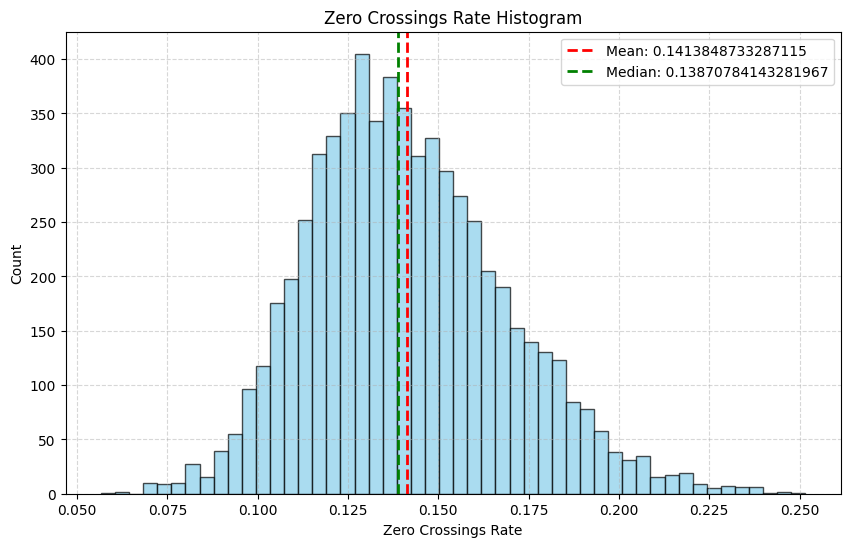

In [38]:
# Describe each metric and create histograms
for metric_name in results_df.columns[1:]:
    values = results_df[metric_name]

    # Describe the metric
    mean_value = values.mean()
    median_value = values.median()
    print(f"{metric_name}:")
    print(f"  Mean: {mean_value}")
    print(f"  Median: {median_value}")
    print(f"  Standard Deviation: {values.std()}")
    print(f"  Min: {values.min()}")
    print(f"  Max: {values.max()}")

    # Create histogram plot with improved formatting and vertical lines
    plt.figure(figsize=(10, 6))  # Increase the plot size
    plt.hist(values, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"{metric_name} Histogram")
    plt.xlabel(metric_name)
    plt.ylabel("Count")
    plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value}')
    plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value}')
    plt.legend()
    plt.show()

F:\\downloads\\en\\clips\\904c9eca40f4a568c8082e5e5052724923478e1673238a6b9727d688fc7ebd20618fc45751bc63afe83112eb07807a01d064f6f3ea544ff5a11f33199252d570.wav


[Text(0.5, 1.0, 'log Power spectrogram')]

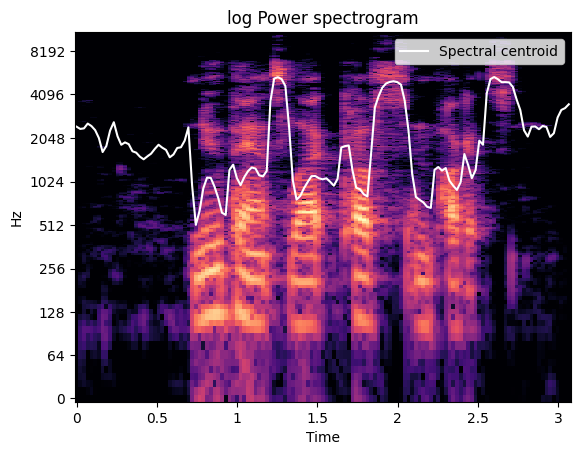

In [10]:
import os
import librosa
import numpy as np
from matplotlib import pyplot as plt

#audio_path = audio_paths[0]
audio_path = mozilla_files_df['full_path'].sample(n=1).values[0]
print(audio_path)

y, sr = librosa.load(audio_path)

duration = librosa.get_duration(y=y, sr=sr)
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
energy_distribution = librosa.feature.chroma_stft(S=np.abs(librosa.stft(y)), sr=sr)

freqs, times, D = librosa.reassigned_spectrogram(y, fill_nan=True)
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
S, phase = librosa.magphase(librosa.stft(y=y))

times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

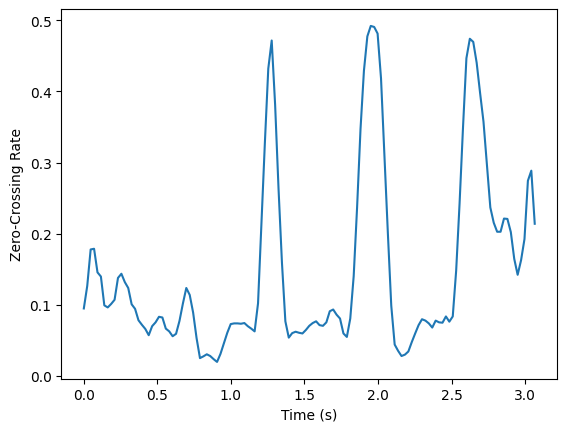

In [11]:
# Calculate zero-crossing rate
zero_crossings_rate = librosa.feature.zero_crossing_rate(y)

# Plot zero-crossing rate over time
plt.plot(librosa.times_like(zero_crossings_rate), zero_crossings_rate[0])
plt.xlabel('Time (s)')
plt.ylabel('Zero-Crossing Rate')
plt.show()

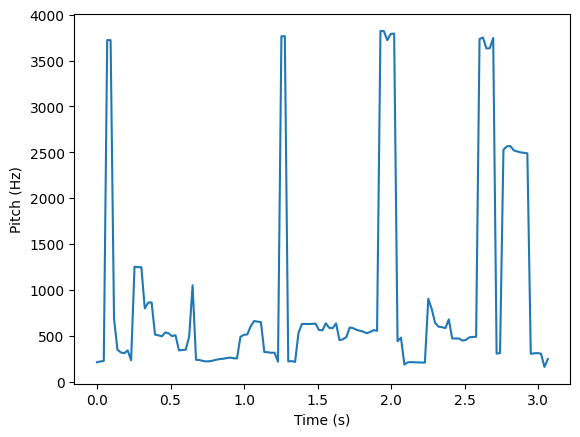

In [12]:
# Calculate pitch
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)

# Plot pitch over time
plt.plot(librosa.times_like(pitches), pitch_values)
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.show()

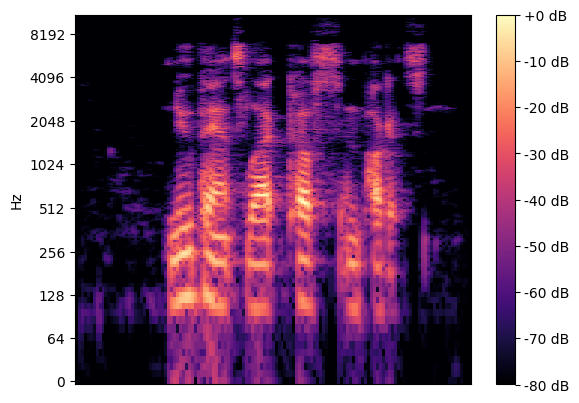

In [13]:
# Calculate the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Display the spectrogram
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.show()

[Text(0.5, 1.0, 'MFCC')]

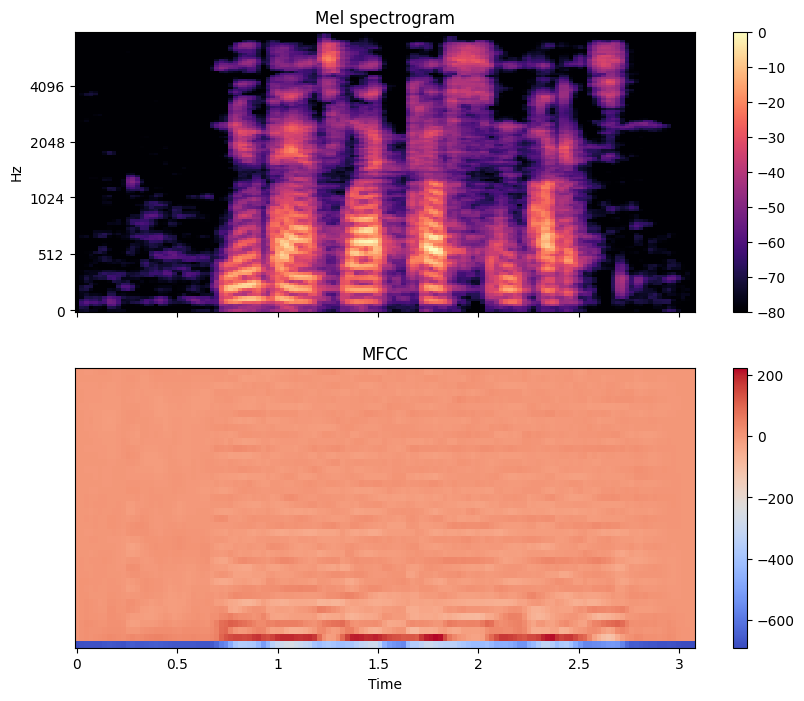

In [21]:
# Calculate MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                   fmax=8000)
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10, 8))
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])

fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

In [2]:
import os
import librosa
import numpy as np
from joblib import Parallel, delayed

def analyze_audio(audio_path):
    if not os.path.exists(audio_path):
        print(f"File not found: {audio_path}")
        return None

    y, sr = librosa.load(audio_path)

    duration = librosa.get_duration(y=y, sr=sr)
    centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    energy_distribution = np.mean(librosa.feature.chroma_stft(S=np.abs(librosa.stft(y)), sr=sr))

    return {
        "duration": duration,
        "centroid": centroid,
        "rolloff": rolloff,
        "bandwidth": bandwidth,
        "energy_distribution": energy_distribution,
    }

def describe_audio_files_parallel(audio_paths):
    # Create a multiprocessing pool
    results = Parallel(n_jobs=8)(delayed(analyze_audio)(a) for a in audio_paths)

    # Filter out None results (files not found)
    results = [r for r in results if r is not None]

    if results:
        durations = [r["duration"] for r in results]
        centroids = [r["centroid"] for r in results]
        rolloffs = [r["rolloff"] for r in results]
        bandwidths = [r["bandwidth"] for r in results]
        energy_distributions = [r["energy_distribution"] for r in results]

        mean_duration = np.mean(durations)
        max_duration = np.max(durations)
        min_duration = np.min(durations)
        total_duration = np.sum(durations)

        mean_centroid = np.mean(centroids)
        mean_rolloff = np.mean(rolloffs)
        mean_bandwidth = np.mean(bandwidths)
        mean_energy_distribution = np.mean(energy_distributions)
    else:
        mean_duration = max_duration = min_duration = total_duration = 0
        mean_centroid = mean_rolloff = mean_bandwidth = mean_energy_distribution = 0

    return {
        "mean_duration": mean_duration,
        "max_duration": max_duration,
        "min_duration": min_duration,
        "total_duration": total_duration,
        "mean_centroid": mean_centroid,
        "mean_rolloff": mean_rolloff,
        "mean_bandwidth": mean_bandwidth,
        "mean_energy_distribution": mean_energy_distribution,
    }


## TIMIT

In [3]:
tinit_files_df = pd.read_csv("tinit_data_files_summary.csv")

print(tinit_files_df.shape[0]) # 6300
# Example usage
audio_paths = tinit_files_df['full_path'].to_list()
audio_stats = describe_audio_files_parallel(audio_paths)
pd.DataFrame.from_dict(audio_stats, orient='index')

# Now you have a single DataFrame containing all the data from the files_path.

6300


,0
mean_duration,3.076169
max_duration,7.788844
min_duration,0.915283
total_duration,19379.867483
mean_centroid,2127.759345
mean_rolloff,3717.863431
mean_bandwidth,1588.471335
mean_energy_distribution,0.612599


## WaveFake

In [8]:
wavefake_files_df = pd.read_csv("wavefake_data_files_summary.csv")
print(wavefake_files_df.shape[0]) ## 134K

# Example usage
audio_paths = wavefake_files_df['full_path'].to_list()
audio_stats = describe_audio_files_parallel(audio_paths)
pd.DataFrame.from_dict(audio_stats, orient='index')

# Now you have a single DataFrame containing all the data from the files_path.

,0
mean_duration,5.797198
max_duration,16.375011
min_duration,0.673379
total_duration,778366.574331
mean_centroid,2579.078655
mean_rolloff,4446.967815
mean_bandwidth,2045.857121
mean_energy_distribution,0.541980


## Mozilla Common Voice

In [11]:
mozilla_files_df = pd.read_csv("mozilla_data_files_summary.csv")
print(mozilla_files_df.shape[0]) # 677k
# Example usage
audio_paths = mozilla_files_df['full_path'].to_list()
audio_stats = describe_audio_files_parallel(audio_paths)
pd.DataFrame.from_dict(audio_stats, orient='index')

# Now you have a single DataFrame containing all the data from the files_path.

676640


,0
mean_duration,4.276914e+00
max_duration,1.448042e+04
min_duration,4.802721e-02
total_duration,2.893931e+06
mean_centroid,2.269194e+03
mean_rolloff,4.295338e+03
mean_bandwidth,2.037350e+03
mean_energy_distribution,6.264124e-01


## LJSPeech

In [10]:
ljspeech_files_df = pd.read_csv("lsjspeech_data_files_summary.csv")
print(ljspeech_files_df.shape[0]) # 13k

# Example usage
audio_paths = ljspeech_files_df['full_path'].to_list()
audio_stats = describe_audio_files_parallel(audio_paths)
pd.DataFrame.from_dict(audio_stats, orient='index')

# Now you have a single DataFrame containing all the data from the files_path.

13100


,0
mean_duration,6.573823
max_duration,10.096190
min_duration,1.110068
total_duration,86117.076281
mean_centroid,2620.771478
mean_rolloff,4481.974707
mean_bandwidth,2027.869267
mean_energy_distribution,0.537453
